## Imports
** Import pandas, numpy, matplotlib,and seaborn. Then set %matplotlib inline **

In [39]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
from scipy import stats
import matplotlib as mpl
import matplotlib.pyplot as plt


## Input the Data


In [40]:
df= pd.read_csv('C:/Users/prana/Desktop/michael cave/Salary_Data.csv')


**Check the head of customers, and check out its info() and describe() methods.**

In [41]:
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [42]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
YearsExperience    30 non-null float64
Salary             30 non-null float64
dtypes: float64(2)
memory usage: 560.0 bytes


## Exploratory Data Analysis

**Let's explore the data!**


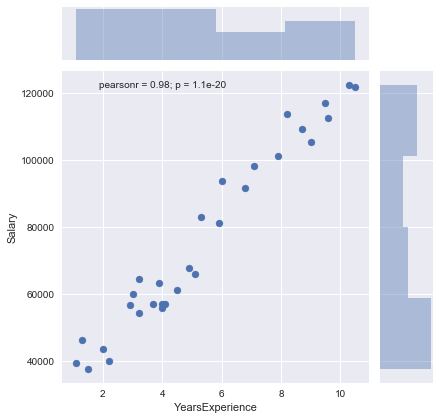

In [44]:
sns.set(color_codes=True)
g = sns.jointplot(x="YearsExperience", y="Salary", data=df)

** Use jointplot to create a 2D hex bin plot comparing Time on App and Length of Membership.**

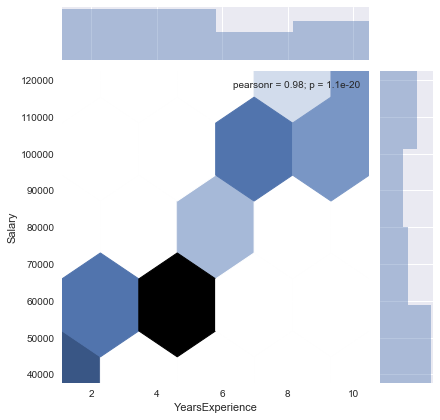

In [45]:
sns.jointplot(x='YearsExperience',y='Salary', data=df, kind='hex')

**Let's explore these types of relationships across the entire data set. Use [pairplot](https://stanford.edu/~mwaskom/software/seaborn/tutorial/axis_grids.html#plotting-pairwise-relationships-with-pairgrid-and-pairplot) to recreate the plot below.**

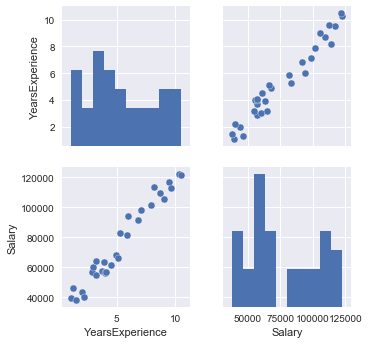

In [46]:
sns.pairplot(df)

**Create a linear model plot (using seaborn's lmplot) of  Yearly Amount Spent vs. Length of Membership. **

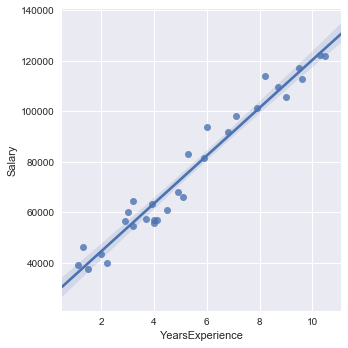

In [47]:
sns.lmplot(x='YearsExperience', y= 'Salary', data= df)

## Training and Testing Data

Now that we've explored the data a bit, let's go ahead and split the data into training and testing sets.
** Set a variable X equal to the YearsExperience and a variable y equal to the "Salary" column. **

In [48]:
y = df['Salary']

In [49]:
X = df[['YearsExperience']]

** Use model_selection.train_test_split from sklearn to split the data into training and testing sets. Set test_size=0.333 and random_state=0**

In [50]:
from sklearn.model_selection import train_test_split

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.333, random_state=0)

## Training the Model

Now its time to train our model on our training data!

** Import LinearRegression from sklearn.linear_model **

In [53]:
from sklearn.linear_model import LinearRegression

**Create an instance of a LinearRegression() model named lm.**

In [54]:
lm = LinearRegression()

** Train/fit lm on the training data.**

In [74]:
model=lm.fit(X_train,y_train)

**Print out the coefficient of the model**

In [56]:
print('Coefficient: \n', lm.coef_)

Coefficient: 
 [ 9345.94244312]


## Predicting Test Data
Now that we have fit our model, let's evaluate its performance by predicting off the test values!


In [57]:
prediction=lm.predict(X_test)

** Create a scatterplot of the real test values versus the predicted values. **

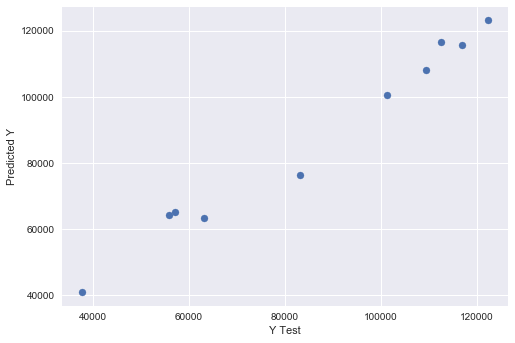

In [58]:
plt.scatter(y_test,prediction)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

## Evaluating the Model

Let's evaluate our model performance by calculating the residual sum of squares and the explained variance score (R^2).

** Calculate the Mean Absolute Error, Mean Squared Error, and the Root Mean Squared Error. ***

In [59]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 3426.42693743
MSE: 21026037.3295
RMSE: 4585.41572047


## Residuals

Let's quickly explore the residuals to make sure everything was okay with our data. 


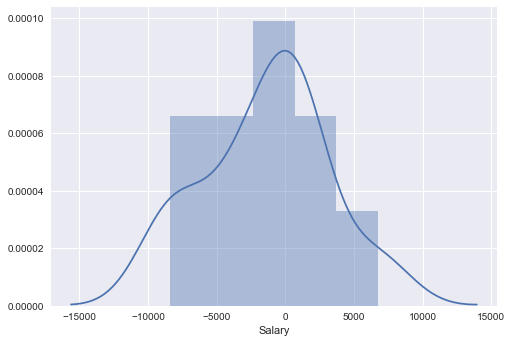

In [60]:
sns.distplot((y_test-prediction),bins=5)

## Conclusion
There is a positive correlation between the salary and years of experience. In prediction we have got a good fit that we can validate by the normal distribution of residuals graph above.

** Recreate the dataframe below. **

In [61]:
coeffecient = pd.DataFrame(lm.coef_,X.columns)
coeffecient.columns = ['Coeffecient']
coeffecient

,Coeffecient
YearsExperience,9345.942443


** How can you interpret these coefficients? **

Interpreting the coefficient:

- Holding all other features fixed, a 1 unit increase in **YearsExperience** is associated with an **increase of 9346 total dollars spent**.

# Accuracy of the predicted model

In [75]:
print ('Score', model.score(X_test, y_test))

Score 0.974915440771
